<a href="https://colab.research.google.com/github/Anna-bel25/AV/blob/main/arbolBOSTON_IN71_13JUL2023(RL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [6]:
url = 'https://raw.githubusercontent.com/Darwin2016/dataset2022/main/dataSETS/housingBOSTON-2.csv'
df = pd.read_csv(url,delimiter=',')

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "MEDV"),
                                        df['MEDV'],
                                        random_state = 123,test_size=0.2
                                    )

In [10]:
X_train.shape,X_test.shape

((404, 13), (102, 13))

Profundidad del árbol: 4
Número de nodos terminales: 14


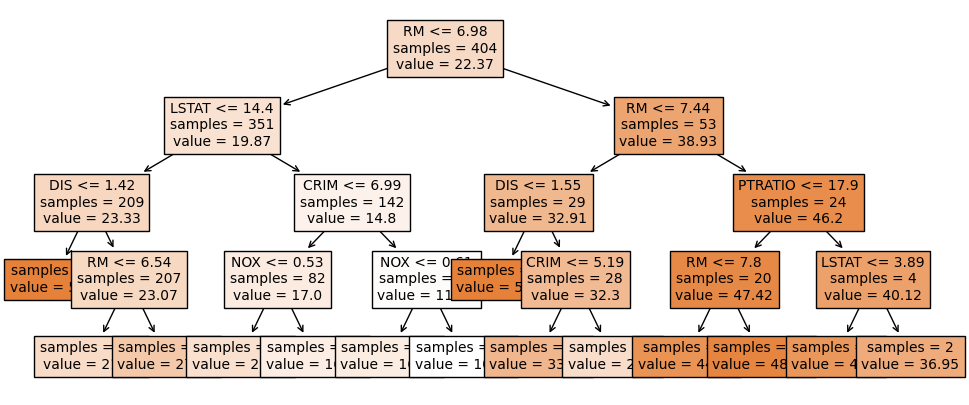

In [11]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = df.drop(columns = "MEDV").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [12]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(df.drop(columns = "MEDV").columns)
               )
print(texto_modelo)

|--- RM <= 6.98
|   |--- LSTAT <= 14.40
|   |   |--- DIS <= 1.42
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.42
|   |   |   |--- RM <= 6.54
|   |   |   |   |--- value: [21.62]
|   |   |   |--- RM >  6.54
|   |   |   |   |--- value: [27.61]
|   |--- LSTAT >  14.40
|   |   |--- CRIM <= 6.99
|   |   |   |--- NOX <= 0.53
|   |   |   |   |--- value: [20.34]
|   |   |   |--- NOX >  0.53
|   |   |   |   |--- value: [16.06]
|   |   |--- CRIM >  6.99
|   |   |   |--- NOX <= 0.61
|   |   |   |   |--- value: [16.57]
|   |   |   |--- NOX >  0.61
|   |   |   |   |--- value: [10.82]
|--- RM >  6.98
|   |--- RM <= 7.44
|   |   |--- DIS <= 1.55
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.55
|   |   |   |--- CRIM <= 5.19
|   |   |   |   |--- value: [33.14]
|   |   |   |--- CRIM >  5.19
|   |   |   |   |--- value: [21.40]
|   |--- RM >  7.44
|   |   |--- PTRATIO <= 17.90
|   |   |   |--- RM <= 7.80
|   |   |   |   |--- value: [44.38]
|   |   |   |--- RM >  7.80
|   |   |   |   |--- v

In [74]:
y_pred = modelo.predict(X_test)

In [88]:
# Error de test del modelo inicia

In [89]:
acum = 0
print("valor real --- valor de predicción --- Error --- Error^2")
for i in range(15):
  error = np.abs(y_test.iloc[i]-y_pred[i]) #calculo del error (valor real - valor de prediccion)
  error2 = error * error
  acum = acum + error2
  print("{:.2f}          {:.2f}                   {:.2f}     {:.4f}".format(y_test.iloc[i],y_pred[i],error,error2))
print(acum)

valor real --- valor de predicción --- Error --- Error^2
15.00          50.00                   35.00     1225.0000
26.60          27.61                   1.01     1.0201
45.40          48.72                   3.32     11.0319
20.80          21.62                   0.82     0.6751
34.90          27.61                   7.29     53.1441
21.90          36.95                   15.05     226.5025
28.70          21.62                   7.08     50.1030
7.20          10.82                   3.62     13.1334
20.00          20.34                   0.34     0.1148
32.20          33.14                   0.94     0.8879
24.10          21.62                   2.48     6.1422
18.50          21.62                   3.12     9.7447
13.50          16.06                   2.56     6.5584
27.00          21.62                   5.38     28.9266
23.10          16.06                   7.04     49.5484
1682.533135570414


In [68]:
# Error Cuadrado Medio
print("Error cuadratico medio: %.2f" % mean_squared_error(y_test,y_pred))

Error cuadratico medio: 41.01


In [69]:
# Puntaje de Varianza. El mejor puntaje es un 1.0
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.50


In [86]:
# probar con datos nuevos para ver que valor predice el modelo

In [71]:
# una entrada nueva
df5 = pd.DataFrame({"RM": [6.7]})

In [72]:
# Crear y entrenar el modelo de regresión lineal
lm = LinearRegression()
X_train = df[['RM']]  # Columna de 'RM' es la característica utilizada para hacer las predicciones
y_train = df['LSTAT']  # Columna de 'LSTAT' es el valor objetivo a predecir
lm.fit(X_train, y_train)

# Hacer predicciones
df5 = pd.DataFrame({'RM': [5]})  # Predicción para una casa con 5 habitaciones
y_pred = lm.predict(df5)

print('Casa con {} habitaciones, su precio estimado: {:.2f}'.format(float(df5.iloc[0]), float(y_pred)))

Casa con 5.0 habitaciones, su precio estimado: 20.67


In [42]:
newDATA=df[['RM','LSTAT','DIS','CRIM']]
newDATA.head()

,RM,LSTAT,DIS,CRIM
0,6.575,4.98,4.0900,0.00632
1,6.421,9.14,4.9671,0.02731
2,7.185,4.03,4.9671,0.02729
3,6.998,2.94,6.0622,0.03237
4,7.147,5.33,6.0622,0.06905


In [77]:
newDATA.shape

(506, 4)

In [87]:
#DEBEN IMPLEMENTAR CON LAS 4 VARIABLES DE ENTRADA

In [83]:
# Selección de columnas de entrada
X = df[["RM", "LSTAT", "DIS", "CRIM"]]
y = df["MEDV"]

# Separación de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

# Creamos el objeto de Regresión Lineal
lm = linear_model.LinearRegression()

# Entrenar el modelo
lm.fit(X_train, y_train)

# Hacer una predicción con datos separados para pruebas (test)
pred = lm.predict(X_test)

print(X_train.shape, X_test.shape)

(404, 4) (102, 4)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(newDATA,df['MEDV'],
                                        random_state = 123,test_size=0.2
                                    )

In [85]:
X_train.shape,X_test.shape

((404, 4), (102, 4))